In [168]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

# plot tree
import matplotlib.pyplot as plt
from sklearn import tree

from matplotlib import style

In [169]:
# global variables
start_features = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
target = "Attrition"

In [215]:
def main():
    # create dataframe with project's data set
    df = pd.read_csv('HR.csv')
    
    # clean the data
    clean_df = clean_data(df)
    
    # get features matrix X and target variable y
    X, y = feature_selection(clean_df)
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Create ranodm forest
    clf = RandomForestClassifier(criterion='gini', max_depth=30, n_estimators=200) 

    # Train random forest Classifer
    clf = clf.fit(X_train,y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    """predict_proba: The first index refers to the probability 
    that the data belong to class 'No', and the second refers to 
    the probability that the data belong to class 'Yes'.""" 
    
    # Model Accuracy
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    # print(y_pred) 
    
    features=clean_df.columns
    importances = clf.feature_importances_
    indices = np.argsort(importances)

    f=plt.figure()
    f.set_figwidth(10)
    f.set_figheight(12)
    plt.style.use('dark_background')
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), features[indices])
    plt.xlabel('Relative Importance')

In [216]:
def extract_categoricals(df):
    cat_features = []
    
    # extract a list of all categorical features for feature engineering except target column
    for col_header in df.columns:
        if col_header != target and df.dtypes[col_header] == object:
            cat_features.append(col_header)         
    return cat_features

In [217]:
def clean_data(df):
    # drop columns that are not needed
    for col_header in df.columns:
        if col_header not in start_features and col_header != target:
            df.drop(col_header, axis=1, inplace=True)
            
    # drop rows that contain at least one empty cell
    df.dropna(axis='rows', thresh=1)
    
    # feature enigneering for categorical data
    clean_df = pd.get_dummies(data=df, columns=extract_categoricals(df))
    
    return clean_df

In [218]:
def feature_selection(clean_df):
    
    # get target variable and exclude it from features
    y = clean_df.pop(target)
      
    # get new feature list
    features = clean_df.columns.tolist()
    
    # split dataset in features and target variable
    X = clean_df[features] # Features Matrix
    
    return X, y

Accuracy: 0.8458049886621315
[[361   3]
 [ 65  12]]
              precision    recall  f1-score   support

          No       0.85      0.99      0.91       364
         Yes       0.80      0.16      0.26        77

    accuracy                           0.85       441
   macro avg       0.82      0.57      0.59       441
weighted avg       0.84      0.85      0.80       441



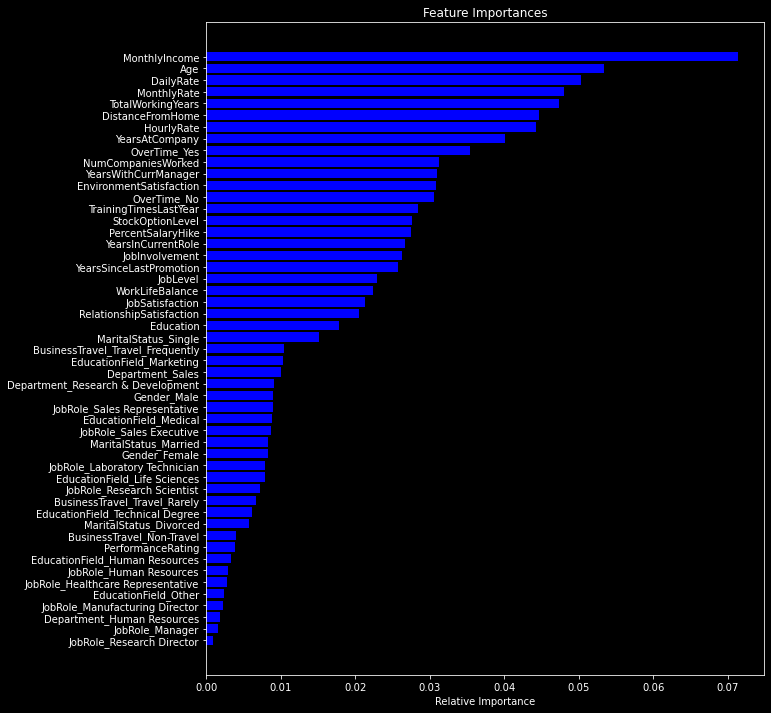

In [219]:
# test
if __name__ == '__main__':
    main()